# `eda_stats_utils`
> Utility Functions that can be used for exploratory data analysis and statistics. Includes all stable utility functions for eda and statistics.


In [ ]:
#|default_exp eda_stats_utils

In [ ]:
#| hide
from nbdev import show_doc, nbdev_export

In [ ]:
#| export
from __future__ import annotations
from pathlib import Path
from IPython.display import Image, display
from pprint import pprint

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [ ]:
#| export
def pandas_all_cols_and_rows(f):
    """decorator function to force display of all the columns in a DataFrame, only for one time"""
    def wrapper(*args, **kwargs):
        max_rows = pd.options.display.max_rows
        max_cols = pd.options.display.max_columns
        pd.options.display.max_rows = None
        pd.options.display.max_columns = None
        f(*args, **kwargs)
        pd.options.display.max_rows = max_rows
        pd.options.display.max_columns = max_cols
    
    return wrapper

In [ ]:
#| export
@pandas_all_cols_and_rows
def display_full_df(df:pd.DataFrame  # DataFrame to display
                   ):
    """Display a dataframe showing all columns"""
    if not isinstance(df, pd.DataFrame): raise TypeError('df must me a pandas DataFrame')
    display(df)

In [ ]:
df = pd.DataFrame(np.random.randint(low=0, high=100, size=(3,50)))
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,85,31,11,1,71,51,9,1,19,7,...,90,18,82,2,73,27,34,63,63,83
1,34,38,79,74,61,97,18,71,17,13,...,26,85,4,46,49,30,5,49,80,22
2,8,87,32,11,28,54,62,44,98,56,...,70,57,70,52,43,99,68,40,46,42


In [ ]:
display_full_df(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,85,31,11,1,71,51,9,1,19,7,0,6,21,41,27,42,73,8,26,88,95,13,66,96,0,50,5,80,43,47,29,70,44,94,24,69,38,74,48,11,90,18,82,2,73,27,34,63,63,83
1,34,38,79,74,61,97,18,71,17,13,72,91,32,63,37,41,91,86,71,4,22,31,18,44,67,4,27,60,16,18,87,95,37,56,50,16,3,86,71,38,26,85,4,46,49,30,5,49,80,22
2,8,87,32,11,28,54,62,44,98,56,10,66,53,94,72,23,35,81,54,9,68,75,15,68,49,70,64,20,9,84,45,38,93,27,22,11,1,91,6,42,70,57,70,52,43,99,68,40,46,42


In [ ]:
#| export
def ecdf(
    data:pd.Series|np.array,            # data to analyse 
    threshold:int|None = None,          # cummulative frequency used as threshold. Must be between 0 and 1
    figsize:tuple(int,int)|None = None  # figure size (width, height)
)-> tuple(np.array, np.array, int):  # sorted data (asc.), cumulative frequencies, last index
    """Compute Empirical Cumulative Distribution Function (ECDF)."""

    n = len(data)
    if threshold is None or int(threshold) == 1:
        last_idx = n -1
    elif 0 < threshold < 1:
        last_idx = min(int(np.floor(n * threshold)), n) -1
    else:
        print(f"threshold = {threshold}. Must be between 0 and 1.\nUsing threshold =  1 instead")
        last_idx = n -1

    # Data to plot on x-axis and y-axis
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    x_to_plot, y_to_plot = x[0:last_idx+1], y[0:last_idx+1]

    # Plot the ECDF
    figsize = (8, 4) if figsize is None else figsize
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x_to_plot, y_to_plot, marker='.', linestyle='none')
    ax.plot([x[0], x_to_plot[-1]], [0, threshold], color='Gainsboro', linestyle='-', linewidth=1)
    ax.set_title(f"Empirical Cumulative Distribution Function \n(with threshold {threshold})")
    ax.xaxis.set_major_locator(plt.MaxNLocator(min_n_ticks=10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.grid(visible=True, which='both', axis='both', color='Gainsboro', linestyle='--', linewidth=1)
    plt.show()

    return x, y, last_idx

*`ecdf`* plots the empirical cumulative distribution function (ECDF), for data cumulative frequencies from 0 to threshold <= 1.

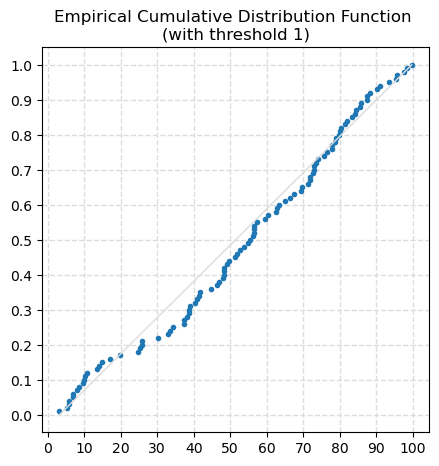

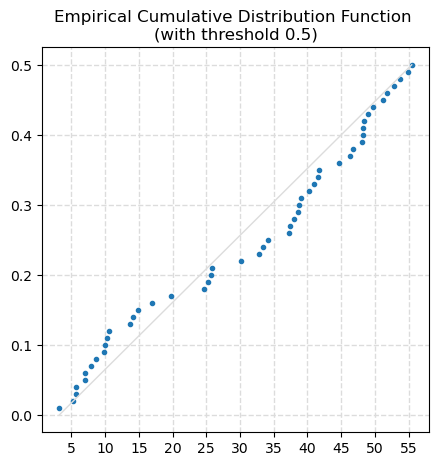

In [ ]:
df = pd.DataFrame(data={'a': np.random.random(100) * 100,'b': np.random.random(100) * 50,'c': np.random.random(100)})
data_1, freq_1, last_idx_1 = ecdf(data=df.a, threshold=1, figsize=(5, 5))
data_2, freq_2, last_idx_2 = ecdf(data=df.a, threshold=0.5, figsize=(5, 5))

It also returns:
- the data used for the ECDF, with values sorted from smallest to largest
- the respective cummulative frequencies 
- the index of data value/frequency plotted (at the threshold)

In [ ]:
#| hide
np.set_printoptions(precision=2, linewidth=120)

In [ ]:
data_1

array([ 3.23,  5.18,  5.71,  5.74,  7.04,  7.05,  7.91,  8.62,  9.77,  9.95, 10.34, 10.64, 13.62, 14.11, 14.88, 16.99,
       19.76, 24.73, 25.2 , 25.71, 25.88, 30.21, 32.86, 33.38, 34.2 , 37.3 , 37.38, 38.03, 38.59, 38.83, 39.01, 40.3 ,
       40.99, 41.53, 41.73, 44.75, 46.27, 46.82, 48.12, 48.25, 48.3 , 48.34, 49.06, 49.73, 51.23, 51.79, 52.81, 53.7 ,
       54.98, 55.47, 56.26, 56.42, 56.55, 56.6 , 57.39, 59.55, 60.48, 62.63, 62.91, 63.24, 65.09, 66.48, 67.57, 69.4 ,
       69.74, 71.34, 71.79, 71.94, 72.7 , 72.82, 72.95, 73.57, 74.1 , 75.71, 76.43, 77.9 , 77.93, 78.68, 78.88, 79.83,
       80.12, 80.26, 81.35, 82.1 , 83.39, 84.22, 84.58, 85.66, 85.86, 87.33, 87.56, 88.23, 90.06, 91.11, 93.61, 95.47,
       95.57, 97.55, 98.46, 99.71])

In [ ]:
freq_1

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
       0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
       0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

The function returns all the sorted data and frequencies, independently from the threshold. In the example above, `data_1` and `data_2` have the same values.

In [ ]:
np.array_equal(data_1, data_2), np.array_equal(freq_1, freq_2)

(True, True)

In [ ]:
data_2[:last_idx_2+1]

array([ 3.23,  5.18,  5.71,  5.74,  7.04,  7.05,  7.91,  8.62,  9.77,  9.95, 10.34, 10.64, 13.62, 14.11, 14.88, 16.99,
       19.76, 24.73, 25.2 , 25.71, 25.88, 30.21, 32.86, 33.38, 34.2 , 37.3 , 37.38, 38.03, 38.59, 38.83, 39.01, 40.3 ,
       40.99, 41.53, 41.73, 44.75, 46.27, 46.82, 48.12, 48.25, 48.3 , 48.34, 49.06, 49.73, 51.23, 51.79, 52.81, 53.7 ,
       54.98, 55.47])

In [ ]:
#| hide
nbdev_export()